## EE4708: Data Analytics Lab - Mid Semester Examination

### Date: September 30, 2029 
### Duration: 3 hrs
### Max. Marks: 30

### Roll Number : CH17B066

### Instructions:

1) Write your roll number is the cell above. 

2) All questions are to be answered in this jupyter notebook only, including any assumptions and observations. The cells have been provided as needed but you can add new cells if required.

3) There are 3 main questions with multiple sub-questions. The corresponding datasets are to be downloaded from the google drive folder link provided. You have to strictly use the datasets provided in the folder bearing your roll number and evaluation will be based only on that. If you use any other dataset, you will be marked zero.  

4) In the codes, any python packages/functions discussed in the course can be used unless mentioned otherwise in the question. 

5) Any parameters required for using an inbuilt python function may be chosen appropriately.   

6) You are free to use any resources at your disposal (assignments, text books, internet, etc.) but you are strictly forbidden from discussing with other students. There will be harsh penalties if two or more people are found to have submitted exactly the same code.

7) For any doubts during the exam, the TAs will be available continuously between 2 pm and 5 pm on a google meet session to clarify your doubts. Joining this session is optional and only to clarify any doubts. Here is the link to the session: https://meet.google.com/mai-ixxh-jaq

8) The codes are only verified for desired functionality and not for speed/efficiency. 


### Question 1: Linear/Polynomial Regression (10 Marks)

Consider the given regression dataset which has 18 input features (x1 to x18)  and a target variable (y). Write a code in the cells provided to perform the following (1.1 to 1.7) on the given dataset:

1.1) Standardise of Normalise the features if deemed necessary

1.2) Use train_test_split function in sklearn with random_state = 0  to split the dataset into train and validation sets in the ratio of 80:20


In [2]:
# Write your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [34]:
#(1.1)Standardizing the data
LR_Data = pd.read_csv('Linear Regression Dataset_19.csv')

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 

LR_features = LR_Data.iloc[:,1:]
LR_y = LR_Data['y']

LR_features = scaler.fit_transform(LR_features)


In [80]:
#(1.2)Splitting data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(LR_features, LR_y, test_size=0.2, random_state = 0, shuffle=True)
print('X_train shape =',X_train.shape,'| y_train shape =',y_train.shape,'\nX_val shape =',X_val.shape,'| y_val shape =',y_val.shape)

X_train shape = (800, 18) | y_train shape = (800,) 
X_val shape = (200, 18) | y_val shape = (200,)


1.3) Learn polynomial regression models of degrees 1, 2 and 3 and print the R^2 score for all the models

In [81]:
#(1.3)Polynomial Regression Models
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
#Degree 1
Deg1Model = LinearRegression().fit(X_train,y_train)
y_val_pred1 = Deg1Model.predict(X_val)
R2Deg1 = r2_score(y_val,y_val_pred1)

print('R2 Score on the training set (Degree 1) = %.2f' %r2_score(y_train,Deg1Model.predict(X_train)))
print('R2 Score on the validation set (Degree 1) = %.2f' %R2Deg1)



R2 Score on the training set (Degree 1) = 0.79
R2 Score on the validation set (Degree 1) = 0.70


In [82]:
#Degree 2

poly = PolynomialFeatures(2)


Deg2Model = LinearRegression().fit(poly.fit_transform(X_train),y_train)
y_val_pred2 = Deg2Model.predict(poly.fit_transform(X_val))
R2Deg2 = r2_score(y_val,y_val_pred2)

print('R2 Score on the training set (Degree 2) = %.2f' %r2_score(y_train,Deg2Model.predict(poly.fit_transform(X_train))))
print('R2 Score on the validation set (Degree 2) = %.2f' %R2Deg2)


R2 Score on the training set (Degree 2) = 0.92
R2 Score on the validation set (Degree 2) = 0.35


In [83]:
#Degree 3

poly = PolynomialFeatures(3)


Deg3Model = LinearRegression().fit(poly.fit_transform(X_train),y_train)
y_val_pred3 = Deg3Model.predict(poly.fit_transform(X_val))
R2Deg3 = r2_score(y_val,y_val_pred3)

print('R2 Score on the training set (Degree 2) = %.2f' %r2_score(y_train,Deg3Model.predict(poly.fit_transform(X_train))))
print('R2 Score on the validation set (Degree 3) = %.2f' %R2Deg3)

R2 Score on the training set (Degree 2) = 1.00
R2 Score on the validation set (Degree 3) = -2964.47


1.4) Which among the 3 models would you chose based on the R^2 score and why ? (Write your answer below) 

#### (1.4) Model with degree 1 is chosen as it has the best r2 score on the validation set.

1.5) On the above chosen polynomial model, apply L1 regularisation (LASSO) with alpha = 0.01 and print the LASSO model coefficients. 

In [84]:
# (1.5) L1 regularisation (LASSO)
from sklearn.linear_model import Lasso
alpha = 0.01
Deg1Lasso = Lasso(alpha=alpha)
Deg1Lasso.fit(X_train,y_train)
y_val_pred_lasso = Deg1Lasso.predict(X_val)
print('Model Coefficients:\n',Deg1Lasso.coef_)
print('R2 score for Deg 1 model with Lasso = %.2f' %r2_score(y_val,y_val_pred_lasso))


Model Coefficients:
 [ -2.4614352   11.74779497  -0.10598645   0.49918897   0.1042974
  -0.19100386   1.30965446 -11.73667983   0.63966173  -0.03066482
   0.95876351  -2.11973473   0.4079839    0.09068764  -0.70313793
  -0.14733839   1.48167917   3.05705083]
R2 score for Deg 1 model with Lasso = 0.70


F:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.359959159062782, tolerance: 7.994892795
  model = cd_fast.enet_coordinate_descent(


1.6) Select features from the LASSO model with a coefficient threshold of 0.001. List below the selected features by their label names (i.e, x1,x2,...)


In [85]:
print("Features with coefficient > 0.001")
coeff = Deg1Lasso.coef_
for i in range(len(coeff)):
    if abs(coeff[i])>=0.001:
        print('Feature x'+str(i+1)+': Coefficient =', coeff[i])

Features with coefficient > 0.001
Feature x1: Coefficient = -2.4614351976151294
Feature x2: Coefficient = 11.74779497291929
Feature x3: Coefficient = -0.105986447811686
Feature x4: Coefficient = 0.4991889690494019
Feature x5: Coefficient = 0.10429739808857719
Feature x6: Coefficient = -0.19100386109908224
Feature x7: Coefficient = 1.309654459840077
Feature x8: Coefficient = -11.736679825710379
Feature x9: Coefficient = 0.6396617326903365
Feature x10: Coefficient = -0.030664823074816466
Feature x11: Coefficient = 0.9587635134487571
Feature x12: Coefficient = -2.1197347257103414
Feature x13: Coefficient = 0.40798389553436853
Feature x14: Coefficient = 0.09068763792055087
Feature x15: Coefficient = -0.7031379340292371
Feature x16: Coefficient = -0.14733838710005312
Feature x17: Coefficient = 1.4816791690953428
Feature x18: Coefficient = 3.0570508288237304


The selected features with coefficient > 0.001 :
x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17, x18 (all)

1.7) With the above chosen features, learn the polynomial regression model of chosen degree (in Q. 1.4) and print the  regression coefficients, mean squared error of predictions on validation set and R^2 score on the validation set. 

In [86]:
#(1.7) Model with selected features (no Lasso)
feature_indices = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17] #Index starts at 0

X_train_new = X_train[:,feature_indices]

Model = LinearRegression().fit(X_train[:,feature_indices],y_train)

y_val_pred_model = Model.predict(X_val[:,feature_indices])

from sklearn.metrics import mean_squared_error
print('Model coefficients:',Model.coef_)
print('Mean squared Error on validation set: %.3f' %mean_squared_error(y_val,y_val_pred_model))
print('R2 score on validation set: %.3f' %r2_score(y_val,y_val_pred_model))

Model coefficients: [ -2.46386982  15.51747508  -0.0795171    0.52051317   0.1342135
  -0.15444582   1.29892934 -15.53763397   0.61985403  -0.07521402
   0.89248083  -2.09527411   0.40430434   0.0974104   -0.62962941
  -0.2524735    1.47287407   3.01539155]
Mean squared Error on validation set: 26.144
R2 score on validation set: 0.696


### Question 2: Naive Baye's Classifier (10 Marks)

Consider the given naive bayes classification dataset which has 10 input features (x1 to x10) and a target class (y). The samples come from 3 different classes labelled 0, 1 and 2. Perform the following (2.1 to 2.4) on the given dataset:

2.1) Use train_test_split function in sklearn with random_state = 42  to split the dataset into train and validation sets in the ratio of 80:20


In [150]:
# Write your code here
#(2.1)
NB_data = pd.read_csv('Naive_Bayes_Dataset_19.csv')
#Splitting data into training and validation sets
NB_features = NB_data[['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10']]
Xnb_train, Xnb_val, ynb_train, ynb_val = train_test_split(NB_features, NB_data['y'], test_size=0.2, random_state = 42, shuffle=True)
print('Xnb_train shape =',Xnb_train.shape,'| ynb_train shape =',ynb_train.shape,'\nXnb_val shape =',Xnb_val.shape,'| ynb_val shape =',ynb_val.shape)

Xnb_train = Xnb_train.reset_index(drop=True)
ynb_train = ynb_train.reset_index(drop=True)

Xnb_val = Xnb_val.reset_index(drop=True)
ynb_val = ynb_val.reset_index(drop=True)

Xnb_train shape = (800, 10) | ynb_train shape = (800,) 
Xnb_val shape = (200, 10) | ynb_val shape = (200,)


2.2) Learn a Gaussian Naive Bayes classifier model from scratch using only functions from math, pandas, numpy and scipy packages (sklearn is not allowed for this step). Using this model, predict the classes of samples in validation set and print the accuracy of predictions.  

In [151]:
# Write your code here
#(2.2)
mean0 = np.mean(Xnb_train[ynb_train==0]) #Mean of features of data points belonging to class 0
std0 = np.std(Xnb_train[ynb_train==0])

mean1 = np.mean(Xnb_train[ynb_train==1]) #Mean of features of data points belonging to class 1
std1 = np.std(Xnb_train[ynb_train==1])

mean2 = np.mean(Xnb_train[ynb_train==2]) #Mean of features of data points belonging to class 2
std2 = np.std(Xnb_train[ynb_train==2])


In [152]:
#Prior probability calculation (ahat)
a_hat=[0]*3
unq_counts = ynb_train.value_counts()
a_hat[0] = len(Xnb_train[ynb_train==0])/len(ynb_train)
a_hat[1] = len(Xnb_train[ynb_train==1])/len(ynb_train)
a_hat[2] = len(Xnb_train[ynb_train==2])/len(ynb_train)
a_hat

[0.29625, 0.3025, 0.40125]

In [153]:
from scipy.stats import norm

dist_0 = [1]*10
dist_1 = [1]*10
dist_2 = [1]*10


for i in range(10):
    dist_0[i] = norm(mean0[i],std0[i])
    

for i in range(10):
    dist_1[i] = norm(mean1[i],std1[i])
    
    
for i in range(10):
    dist_2[i] = norm(mean2[i],std2[i])
dist_0

In [160]:
def posterior_prob(x,ahat,dist):
    temp = 1
    for i in range(len(x)):
        temp =temp*(dist[i].pdf(x[i]))
        
    post_prob = ahat*temp
    return post_prob

probabilities = [0]*3
ynb_val_pred = []
for i in range(len(Xnb_val)):
    probabilities[0] = posterior_prob(Xnb_val.loc[i],a_hat[0],dist_0)
    probabilities[1] = posterior_prob(Xnb_val.loc[i],a_hat[1],dist_1)
    probabilities[2] = posterior_prob(Xnb_val.loc[i],a_hat[2],dist_2)
    ynb_val_pred.append(np.argmax(probabilities))

ynb_val_pred

Accuracy = len(ynb_val[ynb_val==ynb_val_pred])/len(ynb_val)
print('accuracy = ',Accuracy)

accuracy =  0.67


2.3) Perform Feature selection as mentioned in the following steps 2.3.1 to 2.3.4: 

2.3.1) For each feature $x_i$, plot the three gaussian curves of $P(x_i| y=0) , P(x_i | y=1)$ and $P(x_i | y=2)$ using the mean and variance calculated while building the naive bayes model. Ensure that all the plots are labelled properly. There should be 10 plots pertaining to 10 features with each plot having 3 gaussian curves corresponding to 3 classes. 
 



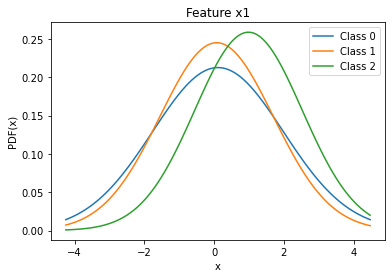

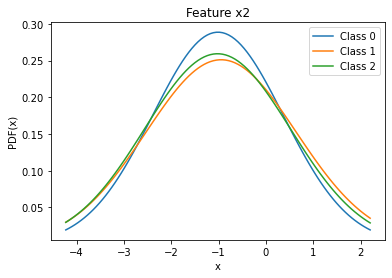

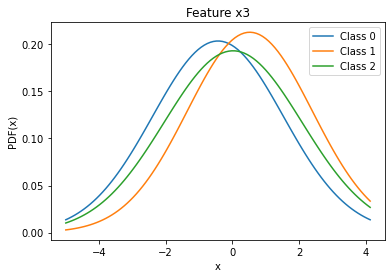

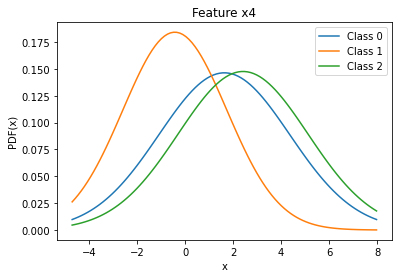

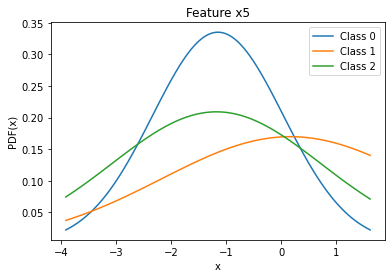

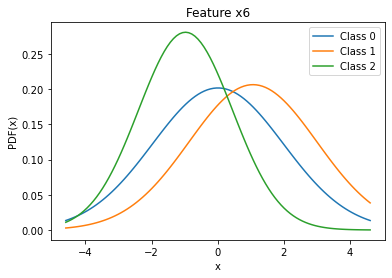

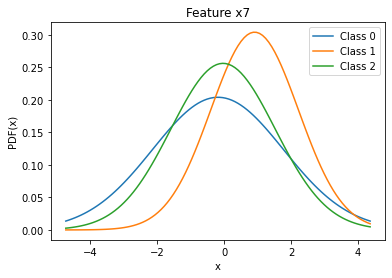

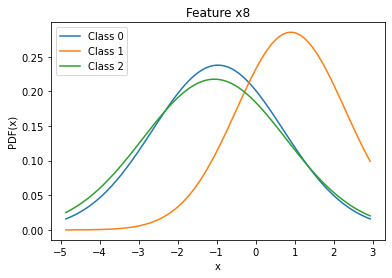

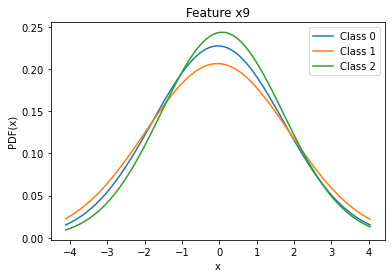

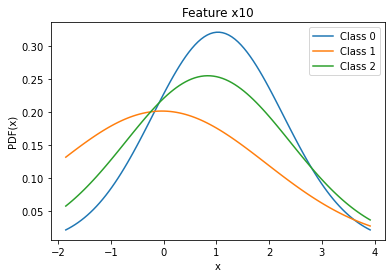

In [166]:
# Write your code here
#(2.3.1)

for i in range(10):
    x = np.linspace(dist_0[i].ppf(0.01),dist_0[i].ppf(0.99),100)
    plt.plot(x,dist_0[i].pdf(x),label='Class 0')
    plt.plot(x,dist_1[i].pdf(x),label='Class 1')
    plt.plot(x,dist_2[i].pdf(x),label='Class 2')
    plt.title('Feature x'+str(i+1))
    plt.xlabel('x')
    plt.ylabel('PDF(x)')
    plt.legend()
    plt.show();

2.3.2) Among the 10 plots, observe the ones with significant overlapping gaussian curves. It indicates that the particular feature is not well separated across classes and is not much relevant in predicting the class using bayes rule. Remove the features one by one starting with most significant overlap as observed in the plots and build a naive bayes model with the rest of the features. Find the accuracy of model predictions on the validation set. Continue removing features as long as  the accuracy of prediction on the validation set improves, otherwise stop. 

In [178]:
# Write your code here
#After removing feature x9:

dist_0 = [1]*9
dist_1 = [1]*9
dist_2 = [1]*9
features = [0,1,2,3,4,5,6,7,9]
for i in range(len(features)):
    dist_0[i] = norm(mean0[features[i]],std0[features[i]])
    

for i in range(len(features)):
    dist_1[i] = norm(mean1[features[i]],std1[features[i]])
    
    
for i in range(len(features)):
    dist_2[i] = norm(mean2[features[i]],std2[features[i]])

probabilities = [0]*3
ynb_val_pred = []
for i in range(len(Xnb_val)):
    probabilities[0] = posterior_prob(Xnb_val.loc[i,['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x10']],a_hat[0],dist_0)
    probabilities[1] = posterior_prob(Xnb_val.loc[i,['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x10']],a_hat[1],dist_1)
    probabilities[2] = posterior_prob(Xnb_val.loc[i, ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x10']],a_hat[2],dist_2)
    ynb_val_pred.append(np.argmax(probabilities))

ynb_val_pred

Accuracy1 = len(ynb_val[ynb_val==ynb_val_pred])/len(ynb_val)
print('accuracy with x9 excluded = ',Accuracy1)



#After removing feature x3,x9:

dist_0 = [1]*8
dist_1 = [1]*8
dist_2 = [1]*8
features = [0,1,3,4,5,6,7,9]
for i in range(len(features)):
    dist_0[i] = norm(mean0[features[i]],std0[features[i]])
    

for i in range(len(features)):
    dist_1[i] = norm(mean1[features[i]],std1[features[i]])
    
    
for i in range(len(features)):
    dist_2[i] = norm(mean2[features[i]],std2[features[i]])

probabilities = [0]*3
ynb_val_pred = []
for i in range(len(Xnb_val)):
    probabilities[0] = posterior_prob(Xnb_val.loc[i,['x1', 'x2', 'x4', 'x5', 'x6', 'x7', 'x8', 'x10']],a_hat[0],dist_0)
    probabilities[1] = posterior_prob(Xnb_val.loc[i,['x1', 'x2', 'x4', 'x5', 'x6', 'x7', 'x8', 'x10']],a_hat[1],dist_1)
    probabilities[2] = posterior_prob(Xnb_val.loc[i, ['x1', 'x2', 'x4', 'x5', 'x6', 'x7', 'x8', 'x10']],a_hat[2],dist_2)
    ynb_val_pred.append(np.argmax(probabilities))

ynb_val_pred

Accuracy2 = len(ynb_val[ynb_val==ynb_val_pred])/len(ynb_val)
print('accuracy with x3 and x9 excluded = ',Accuracy2)



#After removing feature x2,x3,x9:

dist_0 = [1]*7
dist_1 = [1]*7
dist_2 = [1]*7
features = [0,3,4,5,6,7,9]
for i in range(len(features)):
    dist_0[i] = norm(mean0[features[i]],std0[features[i]])
    

for i in range(len(features)):
    dist_1[i] = norm(mean1[features[i]],std1[features[i]])
    
    
for i in range(len(features)):
    dist_2[i] = norm(mean2[features[i]],std2[features[i]])

probabilities = [0]*3
ynb_val_pred = []
for i in range(len(Xnb_val)):
    probabilities[0] = posterior_prob(Xnb_val.loc[i,['x1', 'x4', 'x5', 'x6', 'x7', 'x8', 'x10']],a_hat[0],dist_0)
    probabilities[1] = posterior_prob(Xnb_val.loc[i,['x1', 'x4', 'x5', 'x6', 'x7', 'x8', 'x10']],a_hat[1],dist_1)
    probabilities[2] = posterior_prob(Xnb_val.loc[i, ['x1', 'x4', 'x5', 'x6', 'x7', 'x8', 'x10']],a_hat[2],dist_2)
    ynb_val_pred.append(np.argmax(probabilities))

ynb_val_pred

Accuracy3 = len(ynb_val[ynb_val==ynb_val_pred])/len(ynb_val)
print('accuracy with x2, x3 and x9 excluded = ',Accuracy3)

accuracy with x9 excluded =  0.685
accuracy with x3 and x9 excluded =  0.67
accuracy with x2, x3 and x9 excluded =  0.67


2.3.3) List below the selected and removed features by their label names (i.e, x1,x2,...)

Features x2, x3 and x9 have significant overlaps, hence they are removed.
Selected features -> x1, x4, x5, x6, x7, x8, x10

2.3.4) Plot a curve (properly labelled) with the validation set accuracy on y-axis and number of features on x-axis as varied in 2.3.2 

Text(0, 0.5, 'validation accuracy')

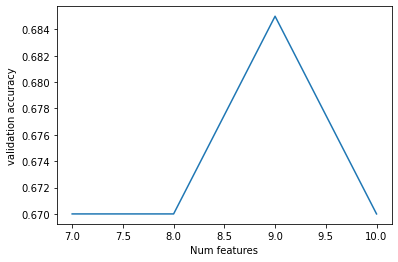

In [179]:
# Write your code here
#(2.3)
plt.plot([10,9,8,7],[Accuracy,Accuracy1,Accuracy2,Accuracy3])
plt.xlabel('Num features')
plt.ylabel('validation accuracy')

2.4) Based on the naive bayes model with selected features, print the accuracy of predictions on the validation set.

In [182]:
# Write your code here #(2.4)
print('Accurcay with the model with selected features (9) = ',Accuracy1)

Accurcay with the model with selected features (9) =  0.685


### Question 3: Logistic Regression Classifier (10 Marks)

Consider the given logistic regression dataset which has 9 input features (x1 to x9)  and a target class (y). The samples come from 2 different classes labelled 0 and 1. Perform the following on the given dataset:

3.1) There are two categorical features (x5 and x6) in the dataset. Encode these features appropriately. Mention as a comment how the encoding is being performed.

3.2) Standardise of Normalise the features if deemed necessary

3.3) Use train_test_split function in sklearn with random_state = 0  to split the dataset into train and validation sets in the ratio of 80:20

In [71]:
# Write your code here
#(3.1)
Logistic_data = pd.read_csv('Logistic Regression Dataset_19.csv')

#x5 has three categories - <1 year, 1-2 year, and >2 year
#x6 has only two categories - Yes or No
#Both features can be encoded using Label Encoding as x5 has ordinal data, and x6 just has binary values.

def x5_label_encoding(column):
    encoding = {'< 1 Year':0, '1-2 Year':1, '> 2 Years':2}
    Labeled_data = column.replace(encoding)
    return Labeled_data

def x6_label_encoding(column):
    encoding = {'Yes':1, 'No':0}
    Labeled_data = column.replace(encoding)
    return Labeled_data

Logistic_data["x5"] = x5_label_encoding(Logistic_data["x5"])
Logistic_data["x6"] = x6_label_encoding(Logistic_data["x6"])
Logistic_data.shape

(7623, 10)

In [70]:
# (3.2) Standardizing using standard scaler
Logistic_features = scaler.fit_transform(Logistic_data[['x1','x2','x3','x4','x5','x6','x7','x8','x9']])

(7623, 9)

In [89]:
# (3.3) Train-test split #Added 'log' next to X and y in variable names to keep them separate from other variables used before
Xlog_train, Xlog_val, ylog_train, ylog_val = train_test_split(Logistic_features, Logistic_data['y'], test_size=0.2, random_state = 0, shuffle=True)
print('Xlog_train shape =',Xlog_train.shape,'| ylog_train shape =',ylog_train.shape,'\nXlog_val shape =',Xlog_val.shape,'| ylog_val shape =',ylog_val.shape)

Xlog_train shape = (6098, 9) | ylog_train shape = (6098,) 
Xlog_val shape = (1525, 9) | ylog_val shape = (1525,)


3.4) Learn a logistic regression model for classification and print the accuracy of the model in predicting the classes of the samples in the validation set. 

In [94]:
# Write your code here
#(3.4)
from sklearn.linear_model import LogisticRegression

Logistic_Model = LogisticRegression()
Logistic_Model.fit(Xlog_train, ylog_train)

Accuracy = Logistic_Model.score(Xlog_val,ylog_val)
print('Accuracy of the model on Validation set = %.3f' %Accuracy)

Accuracy of the model on Validation set = 0.872


3.5) Perform feature selection using ‘RFE’ function (Recursive Feature Elimination) in sklearn and using the function argument, vary the number of features to be selected until the model prediction accuracy obtained on validation set is best possible. Print the best possible accuracy that is obtained.  

In [97]:
# Write your code here
#(3.5)
from sklearn.feature_selection import RFE
scores=[]
for num_features in range(1,10):
    estimator = LogisticRegression()
    selector = RFE(estimator, n_features_to_select=num_features)
    selector = selector.fit(Xlog_train, ylog_train)
    acc = selector.score(Xlog_val,ylog_val)
    scores.append(acc)

print('Best possible score is: %.3f, for num_features = %d' %(np.max(scores),np.argmax(scores)+1))

Best possible score is: 0.874, for num_features = 1


3.6) List the features that were selected and eliminated by their label names (i.e, x1,x2,...).

In [103]:
estimator = LogisticRegression()
selector = RFE(estimator, n_features_to_select=1)
selector = selector.fit(Xlog_train, ylog_train)
print('Selected feature is x'+str(selector.get_support(indices=True)[0]+1))

Selected feature is x4


(3.6)<br>
Selected Feature(s): x4<br>
Eliminated Features: x1, x2, x3, x5, x6, x7, x8, x9

3.7) Plot a curve (properly labelled) with the validation set accuracy on y-axis and number of features on x-axis as varied in step 3.5

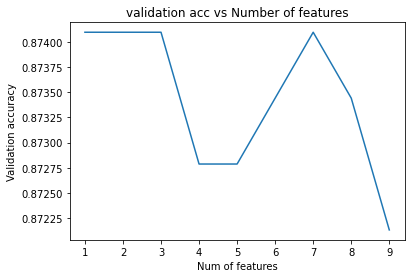

In [104]:
# Write your code here
plt.plot(range(1,10),scores)
plt.xlabel('Num of features')
plt.ylabel('Validation accuracy')
plt.title('validation acc vs Number of features')
plt.show();

3.8) For the given dataset, give your observations as to what happens with and without standardisation or normalisation of input features. Your observations can be based on above obtained results. You can also run any other code you like to give your observations. 

In [105]:
#(3.8)without standardization

Xlog_train, Xlog_val, ylog_train, ylog_val = train_test_split(Logistic_data[['x1','x2','x3','x4','x5','x6','x7','x8','x9']], Logistic_data['y'], test_size=0.2, random_state = 0, shuffle=True)
print('Xlog_train shape =',Xlog_train.shape,'| ylog_train shape =',ylog_train.shape,'\nXlog_val shape =',Xlog_val.shape,'| ylog_val shape =',ylog_val.shape)

Logistic_Model = LogisticRegression()
Logistic_Model.fit(Xlog_train, ylog_train)

Accuracy = Logistic_Model.score(Xlog_val,ylog_val)
print('Accuracy of the model (without standardization) on Validation set = %.3f' %Accuracy)

Xlog_train shape = (6098, 9) | ylog_train shape = (6098,) 
Xlog_val shape = (1525, 9) | ylog_val shape = (1525,)
Accuracy of the model (without standardization) on Validation set = 0.867


F:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### (3.8)<br>
As we can see in the above cell, running the logistic classifier without the standardization process results in model not converging with default number of max iterations. It is because the loss or model coefficients for some variables could be approaching very small or very large values, which results in computational problems.